# Rotating edge experiment

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import itertools
import numpy as np
from IPython.display import Image
from flat import rgba, font, shape, strike, document
from lineart import style, transform, draw
from lineart.primatives import EdgeCollection
from lineart.shapes import Octahedron

In [3]:
e = np.array([
    [0,0,0],
    [1,1,0]
])
p = np.array([0,1,0])
o = np.array([0,0,0])
edges = np.array([e,e,e])
points = np.array([p,p])

In [4]:
edges

array([[[0, 0, 0],
        [1, 1, 0]],

       [[0, 0, 0],
        [1, 1, 0]],

       [[0, 0, 0],
        [1, 1, 0]]])

## split edges

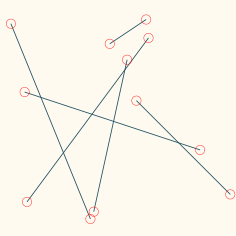

In [46]:
edges = np.random.rand(6,2,3)*100
Image(draw.quick_draw_edges(edges, v=True).png())

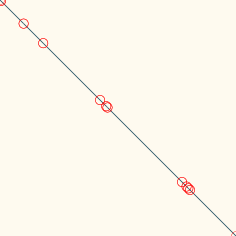

In [172]:
splits = transform.rand_split_edge(e*100,10)

Image(draw.quick_draw_edges(splits, v=True).png())

### Edge collecion rotation and velocity

In [139]:
split_collection = EdgeCollection(
    splits,
    velocities=np.random.randn(*splits[:,0,:].shape),
    angular_speeds=np.arange(splits.shape[0])/30,
    angular_normals=np.repeat([[0,0,1]], splits.shape[0], axis=0)
)

In [140]:
np.repeat([[0,0,1]], 10, axis=0).shape

(10, 3)

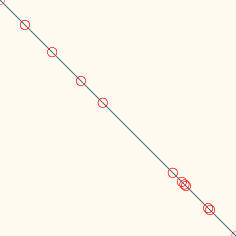

In [141]:
Image(draw.quick_draw_edges(split_collection.edges, v=True).png())

In [142]:
c = np.repeat(split_collection.centers[:, np.newaxis, :], 2, axis=1)

In [143]:
split_collection.n 

11

In [144]:
split_collection.velocities, split_collection.angular_speeds, split_collection.angular_normals

(array([[-0.35628839,  0.04673271,  1.17389419],
        [-0.48758676,  0.30405694,  0.38232716],
        [-1.28237147,  0.46828315,  2.02360913],
        [-1.04254932, -1.53536619,  0.2054672 ],
        [-0.74523318,  0.93718588, -1.4391322 ],
        [-2.47023397,  1.13462749,  0.71019927],
        [ 0.28658776, -0.70390421,  0.43239996],
        [ 0.07454461, -0.13480497,  0.4633198 ],
        [-0.33838716, -0.01204103, -2.23655139],
        [ 0.41341201,  0.47039516, -1.52860078],
        [-0.81481343, -0.63914232, -0.01542571]]),
 array([0.        , 0.03333333, 0.06666667, 0.1       , 0.13333333,
        0.16666667, 0.2       , 0.23333333, 0.26666667, 0.3       ,
        0.33333333]),
 array([[0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1],
        [0, 0, 1]]))

rot_mat.shape=(11, 3, 3)
edge_centers.shape=(11, 2, 3)
centers_shifted.shape=(11, 2, 3)
rotated.shape=(11, 2, 3)
back_shifted.shape=(11, 2, 3)


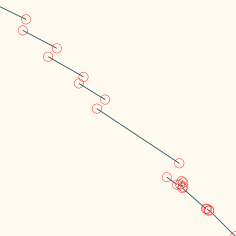

In [145]:
split_collection.step(1)
# split_collection.rotate_indiv(np.pi/50)
Image(draw.quick_draw_edges(split_collection.edges, v=True).png())

### Edge collecion zero movement values

In [180]:
split_collection = EdgeCollection(
    splits,
)

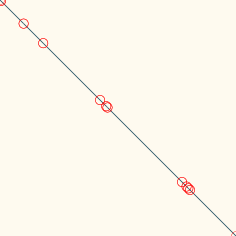

In [181]:
Image(draw.quick_draw_edges(split_collection.edges, v=True).png())

rot_mat.shape=(11, 3, 3)
edge_centers.shape=(11, 2, 3)
centers_shifted.shape=(11, 2, 3)
rotated.shape=(11, 2, 3)
back_shifted.shape=(11, 2, 3)


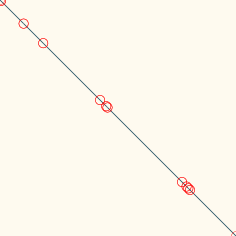

In [182]:
split_collection.step(1)
# split_collection.rotate_indiv(np.pi/50)`
Image(draw.quick_draw_edges(split_collection.edges, v=True).png())

In [188]:
split_collection

EdgeCollection at: object.__repr__(self)
self.edges.shape=(11, 2, 3)
self.lengths (min, mean, max) : (0.57, 12.86, 44.63)

### Octahedron test

In [129]:
octahedron = Octahedron(np.array([50, 50, 40]), 47)

In [130]:
octahedron

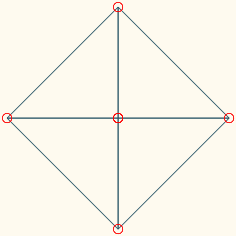

In [17]:
Image(draw.quick_draw_edges(octahedron.edges, v=True).png())

In [18]:
octahedron.rotate_unison(np.array([[50, 50, 40]]), np.array([1, 1, 1]), np.pi * 2/20)

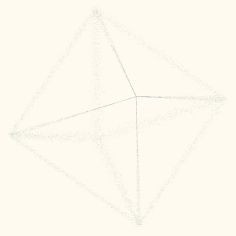

In [19]:
Image(draw.quick_draw_zsampled_edges(octahedron.edges, n=1000, scatter=0.01).png())

In [20]:
#### Tiling code

In [21]:
octahedron = Octahedron(np.array([50, 50, 40]), 47)

In [22]:
octahedron.edges[:, :, :-1].shape

(12, 2, 2)

In [23]:
for e in octahedron.edges[:, :, :-1]+np.array([100,100]):
    print(*e.flatten())

150 197 103 150
150 197 150 150
150 197 197 150
150 197 150 150
150 103 103 150
150 103 150 150
150 103 197 150
150 103 150 150
103 150 150 150
150 150 197 150
197 150 150 150
150 150 103 150


In [24]:
tiled_page = draw.setup_tiled_page(n_cols=5,n_rows=5)

In [27]:
for d in range(1):
    for i,j in itertools.product(range(5), repeat=2):

        draw.draw_edges_on_tile(
            octahedron.edges,
            i,
            j,
            tile_size=100,
            page=tiled_page,
            v=False
        )
        octahedron.rotate_unison(np.array([[50, 50, 40]]), np.array([d*0.05, d*0.05, 1]), np.pi * 2/24)

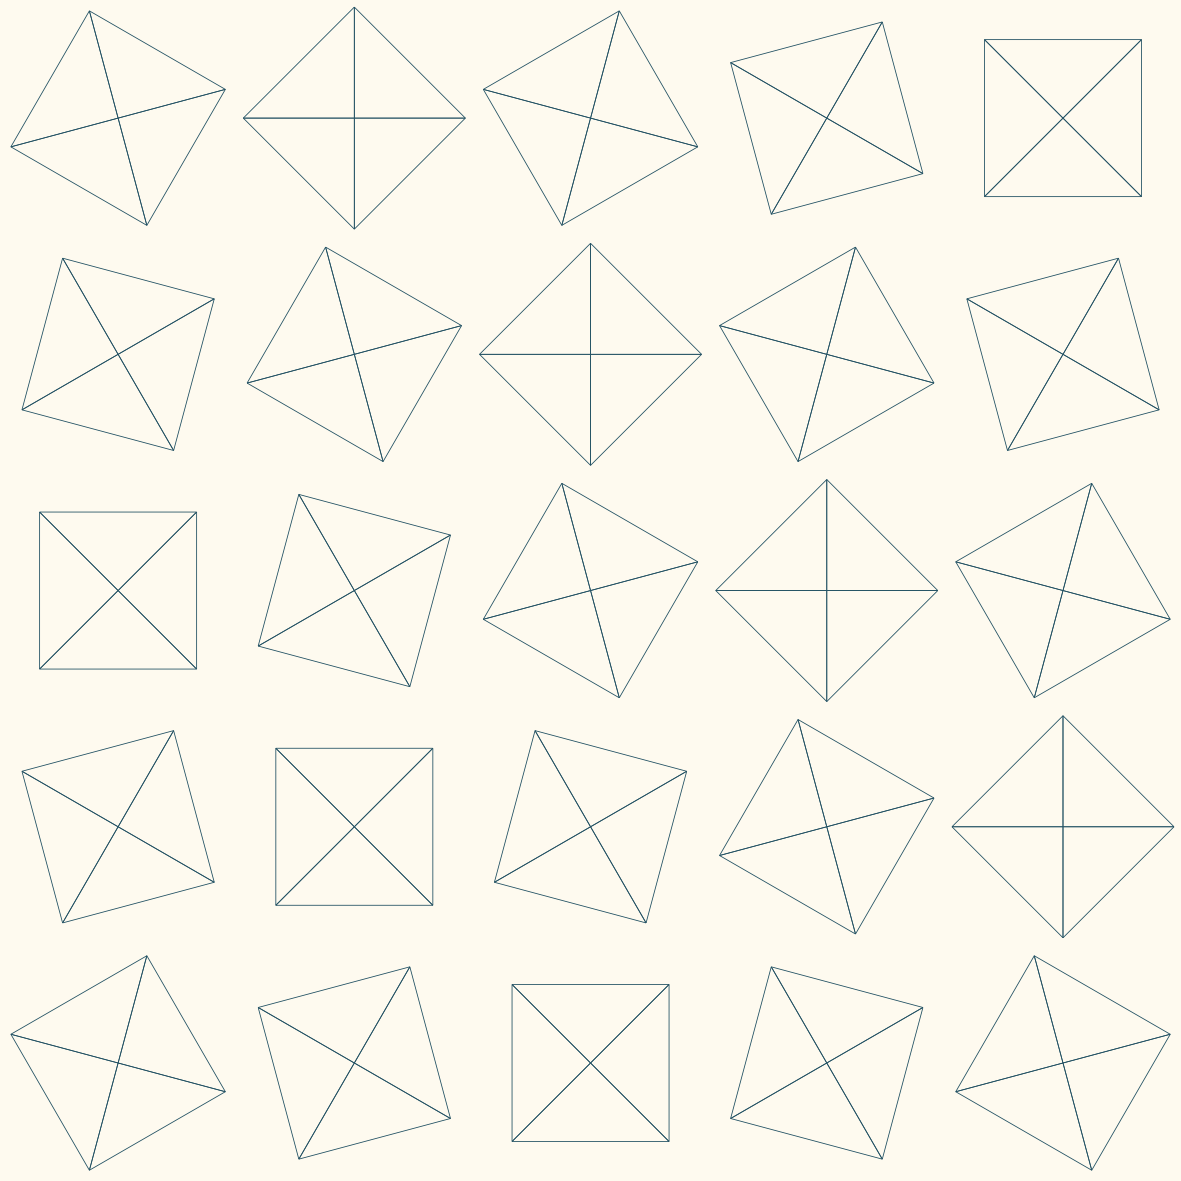

In [28]:
Image(tiled_page.image(kind="rgba", ppi=60).png())